In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv,pinv
from numpy.linalg import det
from numpy.linalg import norm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import empirical_covariance as ecov
%matplotlib inline

Visualize the Data Points

#Question 1

In [0]:
def viz_data_points(o1,o2,o3):
  
  
  plt.figure(figsize=(15,15))
  plt.scatter(o1[0],o1[1],label='label_1')
  plt.scatter(o2[0],o2[1],label='label_2')
  plt.scatter(o3[0],o3[1],label='label_3')
  plt.title('Visualization of multivariate data points')
  
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

In [0]:
def viz_data_points_single(o1,c1):
  
  
  plt.figure(figsize=(15,15))
  plt.xlim(-4,4)
  plt.ylim(-3,3)
  if(c1==1):
    plt.scatter(o1[0],o1[1],label='label_{}'.format(c1),color='b')
  elif(c1==2):
    plt.scatter(o1[0],o1[1],label='label_{}'.format(c1),color='orange')
  else:
    
     plt.scatter(o1[0],o1[1],label='label_{}'.format(c1),color='g')
    
  
  plt.title('Visualization of multivariate data points for class {}'.format(c1))
  
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

Plotting the decison boundary with the differnt labels od classification

In [0]:
def Decision_Boundary1(w1_1,w1_2,w1_3,w2_1,w2_2,w2_3,w3_1,w3_2,w3_3,xx,yy,a):
  plt.figure(figsize=(15,15))
  plt.contourf(xx, yy, a,cmap=plt.cm.Pastel1, alpha=0.8)
  plt.scatter(w1_1.iloc[:,0],w1_1.iloc[:,1],label='class 1 predicted as class 1')
  plt.scatter(w1_2.iloc[:,0],w1_2.iloc[:,1],label='class 1 predicted as class 2',marker='^')
  plt.scatter(w1_3.iloc[:,0],w1_3.iloc[:,1],label='class 1 predicted as class 3',marker='^')
  
  plt.scatter(w2_1.iloc[:,0],w2_1.iloc[:,1],label='class 2 predicted as class 1',marker='^')
  plt.scatter(w2_2.iloc[:,0],w2_2.iloc[:,1],label='class 2 predicted as class 2')
  plt.scatter(w2_3.iloc[:,0],w2_3.iloc[:,1],label='class 2 predicted as class 3',marker='^')
  
  plt.scatter(w3_1.iloc[:,0],w3_1.iloc[:,1],label='class 3 predicted as class 1',marker='^')
  plt.scatter(w3_2.iloc[:,0],w3_2.iloc[:,1],label='class 3 predicted as class 2',marker='^')
  plt.scatter(w3_3.iloc[:,0],w3_3.iloc[:,1],label='class 3 predicted as class 3')
  
  plt.title('Class predictions with decision Boundary')
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

Potting the decision boundary for single class

In [0]:
def Single_class_boundary1(w1_1,w1_2,w1_3,xx,yy,a,c1):
  plt.figure(figsize=(15,15))
  plt.contourf(xx, yy, a,cmap=plt.cm.Pastel1, alpha=0.8)
  
  plt.scatter(w1_1.iloc[:,0],w1_1.iloc[:,1],label='class {} predicted as class {}'.format(c1,1))
  plt.scatter(w1_2.iloc[:,0],w1_2.iloc[:,1],label='class {} predicted as class {}'.format(c1,2))
  plt.scatter(w1_3.iloc[:,0],w1_3.iloc[:,1],label='class {} predicted as class {}'.format(c1,3))
  

  plt.title('Class {} predictions with decision Boundary'.format(c1))
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

In [0]:
def make_meshgrid(x, y, h=.1):
   
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

Generates the number of points for the various classes

In [0]:
def Sample_Generator(p_w1,p_w2,p_w3):
  N = np.random.uniform( size=10000)
  n1=N[N<=p_w1]
  n2=N[(N>p_w1) & (N<=(p_w2+p_w1))]
  n3=N[N>(p_w2+p_w1) ]
  return(len(n1),len(n2),len(n3))

Converts an iid to a multivriate gausian distribution using linear transformation

In [0]:
def Multi_var_Gen(mean1,cov1,mean2,cov2,mean3,cov3,n1,n2,n3):
  iidu1 = np.random.normal(loc=0, scale=1, size=n1*2) # generating IIDU
  iidu1 = iidu1.reshape(2,-1)
  iidu2 = np.random.normal(loc=0, scale=1, size=n2*2)
  iidu2 = iidu2.reshape(2,-1)
  iidu3 = np.random.normal(loc=0, scale=1, size=n3*2)
  iidu3 = iidu3.reshape(2,-1)
 
  #mean10=np.ones((2,n1))*mean1[0]
  C1 = np.linalg.cholesky(cov1)
  o1= (np.dot(C1, iidu1).T+ mean1).T


  #mean20=np.ones((2,n2))*mean2[0]
  C2 = np.linalg.cholesky(cov2)
  o2= (np.dot(C2, iidu2).T+ mean2).T
  
  #mean30=np.ones((2,n3))*mean3[0]
  C3 = np.linalg.cholesky(cov3)
  o3= (np.dot(C3, iidu3).T+ mean3).T
  
  return(o1,o2,o3)


# Question 1

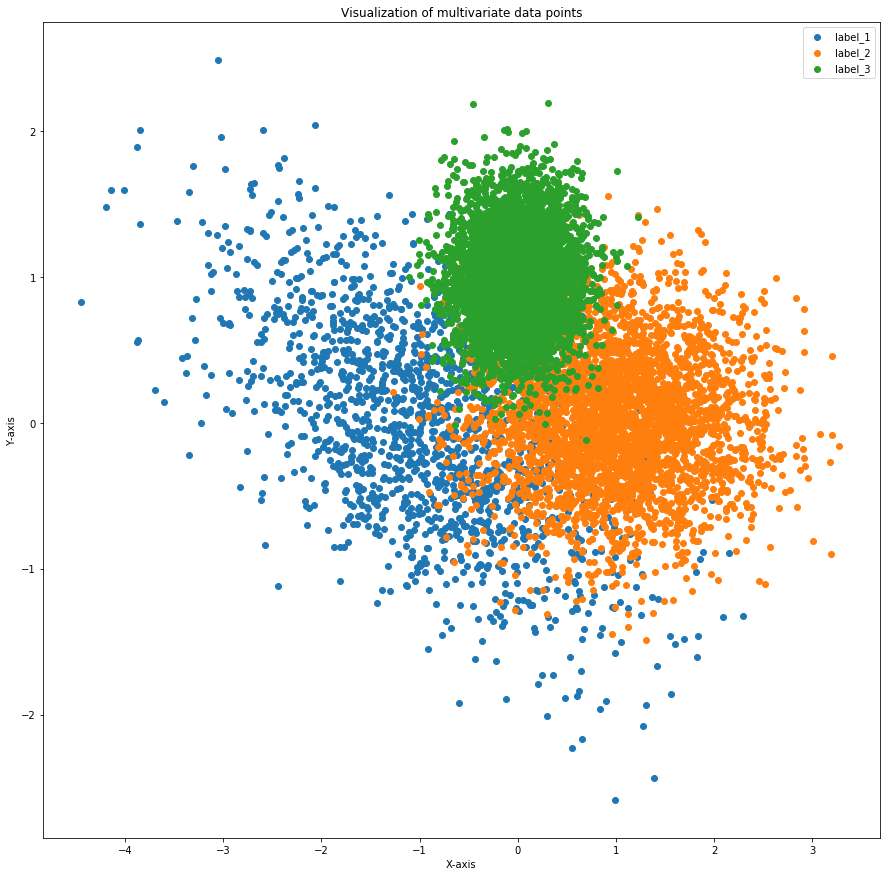

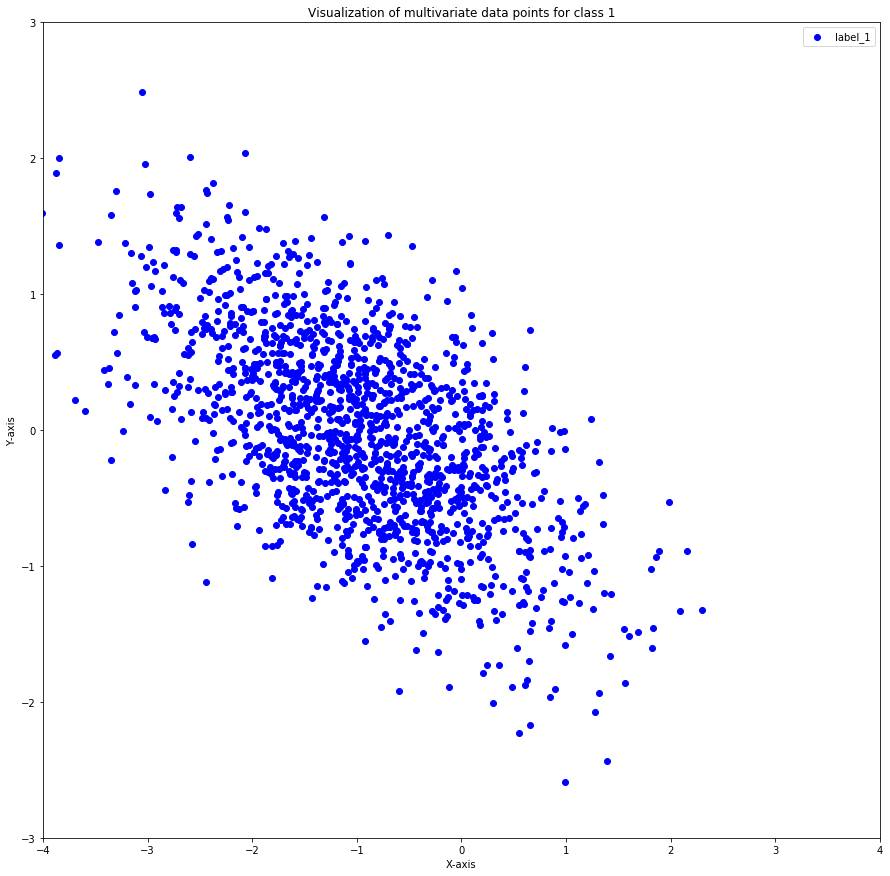

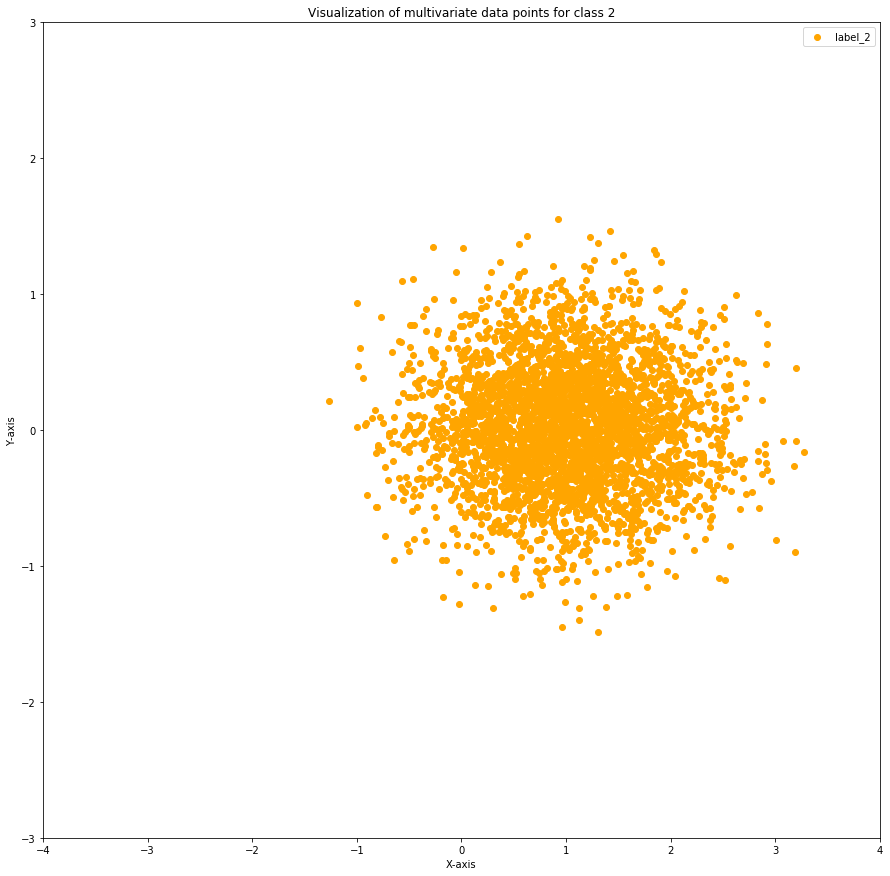

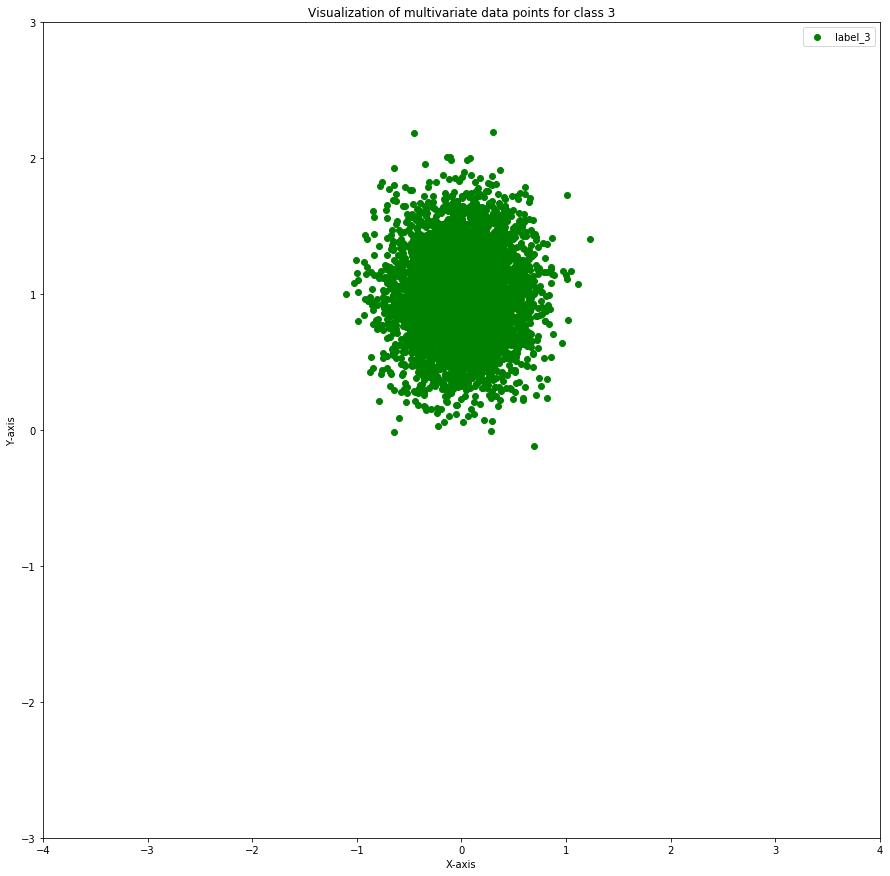

In [0]:
mean1=[-1,0]
cov1=[[1,-0.4],[-0.4,0.5]]

mean2=[1,0]
cov2=[[0.5,0],[0,0.2]]

mean3=[0,1]
cov3=[[0.1,0],[0,0.1]]
  
p_w1=0.15
p_w2=0.35
p_w3=0.5

n1,n2,n3 = Sample_Generator(p_w1,p_w2,p_w3)
o1,o2,o3=Multi_var_Gen(mean1,cov1,mean2,cov2,mean3,cov3,n1,n2,n3)
viz_data_points(o1,o2,o3)
viz_data_points_single(o1,1)
viz_data_points_single(o2,2)
viz_data_points_single(o3,3)

In [0]:
mean1=np.array(mean1).reshape(2,1)
cov1=np.array(cov1)
mean2=np.array(mean2).reshape(2,1)
cov2=np.array(cov2)
mean3=np.array(mean3).reshape(2,1)
cov3=np.array(cov3)


In [0]:
W1=(-0.5)*inv(cov1) # calculating the various generator functions to classify them into the various classes
W2=(-0.5)*inv(cov2)
W3=(-0.5)*inv(cov3)

w1=inv(cov1)@mean1
w2=inv(cov2)@mean2
w3=inv(cov3)@mean3

w10=-(mean1.T@inv(cov1)@mean1/2)- np.log(det(cov1))/2 + np.log(p_w1)
w20=-(mean2.T@inv(cov2)@mean2/2)- np.log(det(cov2))/2 + np.log(p_w2)
w30=-(mean3.T@inv(cov3)@mean3/2)- np.log(det(cov3))/2 + np.log(p_w3)

g1_1=np.diag(o1.T@W1@o1) + (w1.T@o1) + w10
g1_2=np.diag(o1.T@W2@o1) + (w2.T@o1) + w20
g1_3=np.diag(o1.T@W3@o1) + (w3.T@o1) + w30

g2_1=np.diag(o2.T@W1@o2) + (w1.T@o2) + w10
g2_2=np.diag(o2.T@W2@o2) + (w2.T@o2) + w20
g2_3=np.diag(o2.T@W3@o2) + (w3.T@o2) + w30

g3_1=np.diag(o3.T@W1@o3) + (w1.T@o3) + w10
g3_2=np.diag(o3.T@W2@o3) + (w2.T@o3) + w20
g3_3=np.diag(o3.T@W3@o3) + (w3.T@o3) + w30




In [0]:
ww1=pd.DataFrame(data=o1.T,columns=['d1','d2'])
ww1['Real_Label']=np.ones(n1)*1
ww2=pd.DataFrame(data=o2.T,columns=['d1','d2'])
ww2['Real_Label']=np.ones(n2)*2
ww3=pd.DataFrame(data=o3.T,columns=['d1','d2'])
ww3['Real_Label']=np.ones(n3)*3

n1_1=ww1[((g1_1>g1_2)&(g1_1>g1_3)).reshape(-1,1)]
n1_2=ww1[((g1_2>g1_1)&(g1_2>g1_3)).reshape(-1,1)]
n1_3=ww1[((g1_3>g1_1)&(g1_3>g1_2)).reshape(-1,1)]

n2_1=ww2[((g2_1>g2_2)&(g2_1>g2_3)).reshape(-1,1)]
n2_2=ww2[((g2_2>g2_1)&(g2_2>g2_3)).reshape(-1,1)]
n2_3=ww2[((g2_3>g2_1)&(g2_3>g2_2)).reshape(-1,1)]

n3_1=ww3[((g3_1>g3_2)&(g3_1>g3_3)).reshape(-1,1)]
n3_2=ww3[((g3_2>g3_1)&(g3_2>g3_3)).reshape(-1,1)]
n3_3=ww3[((g3_3>g3_1)&(g3_3>g3_2)).reshape(-1,1)]


In [0]:
d=list([len(n1_1),len(n1_2),len(n1_3),len(n2_1),len(n2_2),len(n2_3),len(n3_1),len(n3_2),len(n3_3)])
d=np.array(d).reshape(3,3)

confu=pd.DataFrame(data=d,columns=['Predicted Label 1','Predicted Label 2','Predicted Label 3'],index=['Real Label 1','Real Label 2','Real Label 3'])

In [0]:
print("Sample size for class 1 is {} sample size for class 2 is {} Sample size of class 3 is {}".format(n1,n2,n3))
print('The number of labels in class 1 classified as label 1 are {} , as label 2 are {} and as label 3 are {}'.format(len(n1_1),len(n1_2),len(n1_3))) 
print('The number of labels in class 2 classified as label 1 are {} , as label 2 are {} and as label 3 are {}'.format(len(n2_1),len(n2_2),len(n2_3))) 
print('The number of labels in class 3 classified as label 1 are {} , as label 2 are {} and as label 3 are {}'.format(len(n3_1),len(n3_2),len(n3_3))) 
error=(len(n1_2)+len(n1_3)+len(n2_1)+len(n2_3)+len(n3_1)+len(n3_2))

print("Total Error {}".format(error))
print("Total estimated probability of  Error is {}".format(error/10000))


Sample size for class 1 is 1531 sample size for class 2 is 3492 Sample size of class 3 is 4977
The number of labels in class 1 classified as label 1 are 1230 , as label 2 are 217 and as label 3 are 84
The number of labels in class 2 classified as label 1 are 122 , as label 2 are 3134 and as label 3 are 236
The number of labels in class 3 classified as label 1 are 33 , as label 2 are 100 and as label 3 are 4844
Total Error 792
Total estimated probability of  Error is 0.0792


In [0]:
confu

,Predicted Label 1,Predicted Label 2,Predicted Label 3
Real Label 1,1230,217,84
Real Label 2,122,3134,236
Real Label 3,33,100,4844


In [0]:
w=ww1.append(ww2).append(ww3)
X=w.iloc[:,:2].copy()
y=w['Real_Label'].copy()
Xa, Xb = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(Xa, Xb)
new=np.c_[xx.ravel(), yy.ravel()]


In [0]:
pl1_1=(np.diag(new@W1@new.T) + (w1.T@new.T) + w10).reshape(-1,1)
pl1_2=(np.diag(new@W2@new.T) + (w2.T@new.T) + w20).reshape(-1,1)
pl1_3=(np.diag(new@W3@new.T) + (w3.T@new.T) + w30).reshape(-1,1)

a=[]
for i in range(len(pl1_1)):
  if( (pl1_1[i]>pl1_2[i]) & (pl1_1[i]>pl1_3[i]) ):
    a.append(1)
    
  elif( (pl1_2[i]>pl1_1[i]) & (pl1_2[i]>pl1_3[i]) ):
    a.append(2)
    
  else:
    a.append(3)

a=(np.array(a)).reshape(xx.shape)   

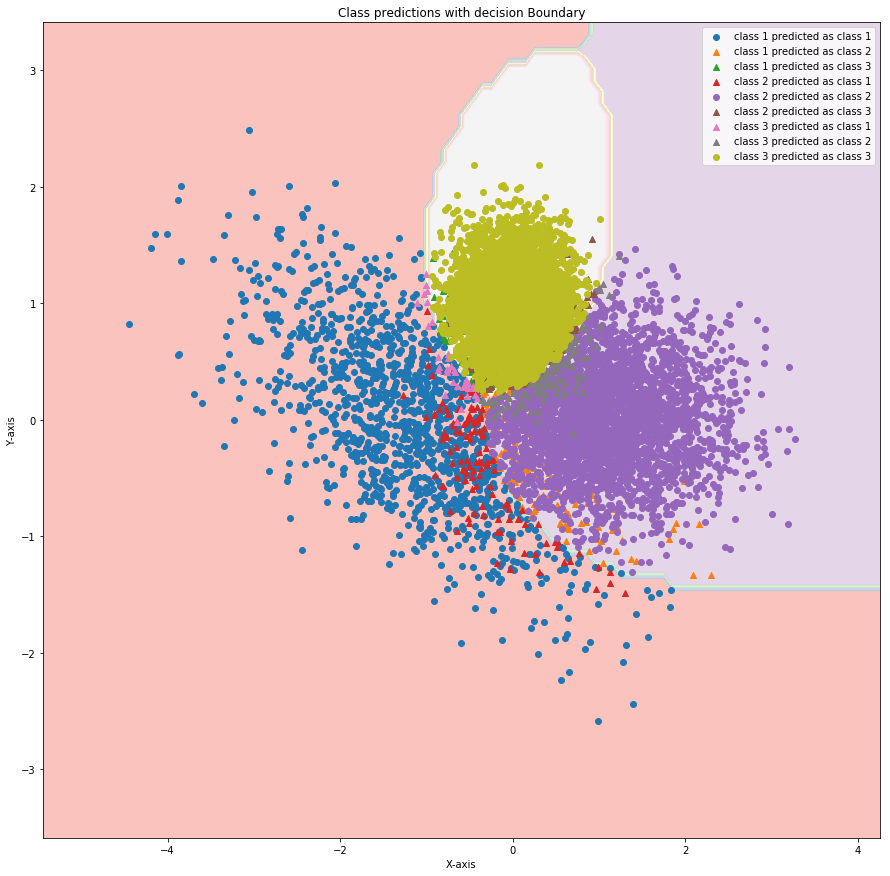

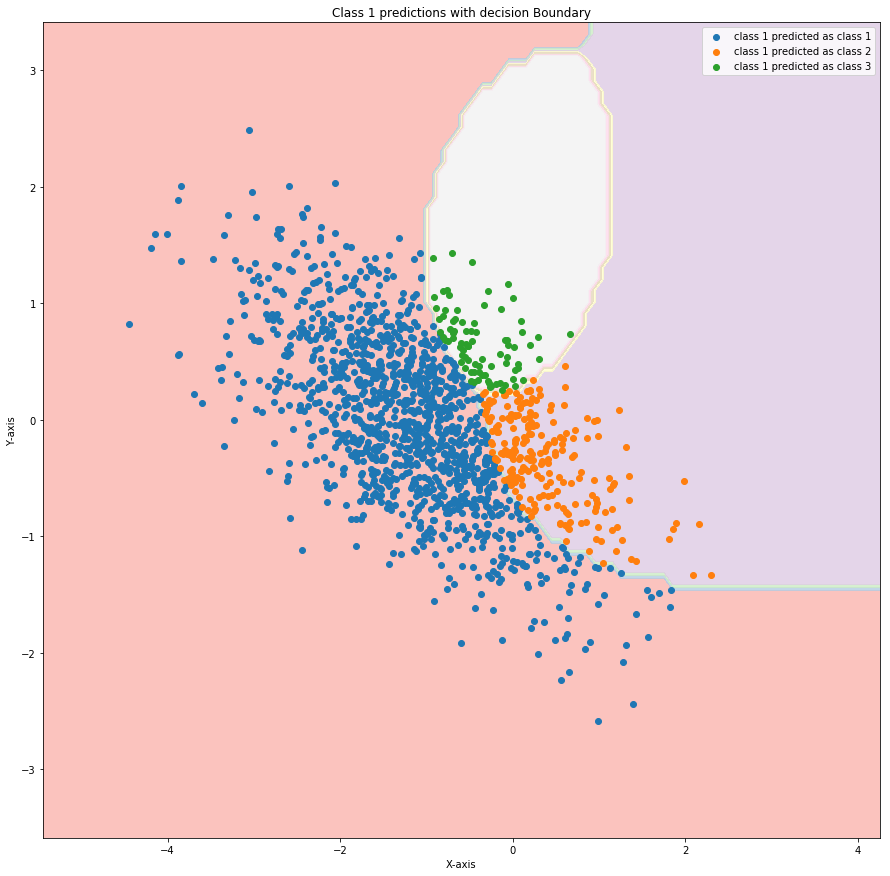

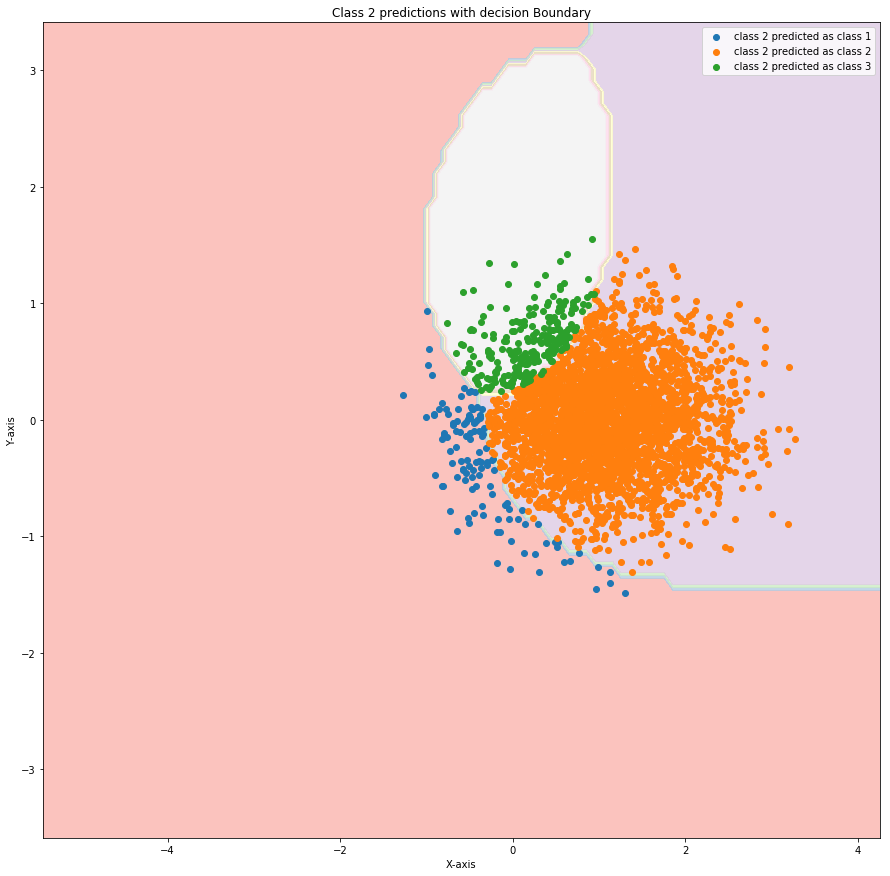

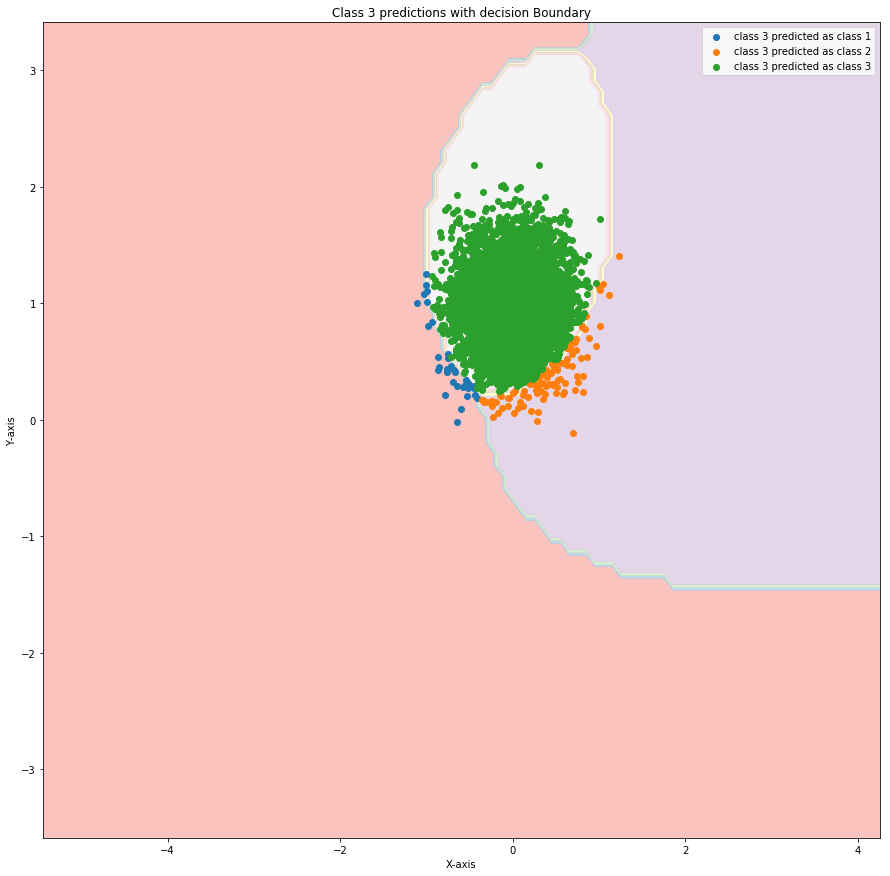

In [0]:
Decision_Boundary1(n1_1,n1_2,n1_3,n2_1,n2_2,n2_3,n3_1,n3_2,n3_3,xx,yy,a)
Single_class_boundary1(n1_1,n1_2,n1_3,xx,yy,a,1)
Single_class_boundary1(n2_1,n2_2,n2_3,xx,yy,a,2)
Single_class_boundary1(n3_1,n3_2,n3_3,xx,yy,a,3)

# Question 3

In [0]:
N=10 # Sample Size
# generating gamma square values
gamma2=[]
for i in range(-8,8,1):
  gamma2.append(10**(i))
sigma2=0.3**2 # sigma square values to generate a constant noise
a=2
b=-1
c=-2
d=1


In [0]:
l=200
c=0
q_min_M=[]
q_25_M=[]
q_med_M=[]
q_75_M=[]
q_max_M=[]
error_l_M=[]
for i in gamma2:
  error=[]
  for j in range(l):
    v=np.random.normal(loc=0,scale=sigma2,size=N) # Gaussian noise with zero mean
    w_true=np.array(list([a,b,c,d])) # creating the w true parameter
    x=np.random.uniform(-1,1,size=N) # generating point for x from a uniform distro between -1,1
    X=(np.vstack([x**3,x**2,x,np.ones(10)])).T # deriving the X matrix
    y=(X@w_true)+v # deriving y values
    w=inv((X.T@X)+ (sigma2/(i)*np.eye(4)))@X.T@y # MAP value for the w parameter
    error.append(np.sum((w_true-w)**2))
    
  print('\n')
  print("the Gamma values is {}".format(i))
  print("The minimum Values is {}".format(np.min(error)))
  q_min_M.append(np.min(error))
  print("The 25th percentile Values is {}".format(np.quantile(error,.25)))
  q_25_M.append(np.quantile(error,.25))
  print("The median Values is {}".format(np.median(error)))
  q_med_M.append(np.median(error))
  print("The 75th percentile Values is {}".format(np.quantile(error,.75)))
  q_75_M.append(np.quantile(error,.75))
  print("The maximum Values is {}".format(np.max(error)))
  q_max_M.append(np.max(error))
  error_l_M.append(error)
  




the Gamma values is 1e-08
The minimum Values is 5.999995944405484
The 25th percentile Values is 5.999997230545379
The median Values is 5.999997619399532
The 75th percentile Values is 5.999998011179075
The maximum Values is 5.999998755315969


the Gamma values is 1e-07
The minimum Values is 5.999955904614128
The 25th percentile Values is 5.999972557047688
The median Values is 5.99997686854914
The 75th percentile Values is 5.999980491791216
The maximum Values is 5.999991245877456


the Gamma values is 1e-06
The minimum Values is 5.999477318680368
The 25th percentile Values is 5.999708874694952
The median Values is 5.999755981280655
The 75th percentile Values is 5.999792047016218
The maximum Values is 5.999886819384969


the Gamma values is 1e-05
The minimum Values is 5.995511613761817
The 25th percentile Values is 5.997234417510047
The median Values is 5.997590101963045
The 75th percentile Values is 5.998011018605437
The maximum Values is 5.99890224608084


the Gamma values is 0.0001
T

In [0]:
# MLE estimation
l=200
c=0
q_min=[]
q_25=[]
q_med=[]
q_75=[]
q_max=[]
error_l=[]
for i in gamma2:
  error=[]
  for j in range(l):
    v=np.random.normal(loc=0,scale=sigma2,size=N) # Gaussian noise with zero mean
    w_true=np.array(list([a,b,c,d])) # creating the w true parameter
    x=np.random.uniform(-1,1,size=N) # generating point for x from a uniform distro between -1,1
    X=(np.vstack([x**3,x**2,x,np.ones(10)])).T # deriving the X matrix
    y=(X@w_true)+v # deriving y values
    w=inv((X.T@X))@X.T@y # MAP value for the w parameter
    error.append(np.sum((w_true-w)**2))
    
  print('\n')
  print("the Gamma values is {}".format(i))
  print("The minimum Values is {}".format(np.min(error)))
  q_min.append(np.min(error))
  print("The 25th percentile Values is {}".format(np.quantile(error,.25)))
  q_25.append(np.quantile(error,.25))
  print("The median Values is {}".format(np.median(error)))
  q_med.append(np.median(error))
  print("The 75th percentile Values is {}".format(np.quantile(error,.75)))
  q_75.append(np.quantile(error,.75))
  print("The maximum Values is {}".format(np.max(error)))
  q_max.append(np.max(error))
  error_l.append(error)
  



the Gamma values is 1e-08
The minimum Values is 0.0013125594082253464
The 25th percentile Values is 0.03184369443408909
The median Values is 0.08735951696126859
The 75th percentile Values is 0.246174267437403
The maximum Values is 37.87927792557142


the Gamma values is 1e-07
The minimum Values is 0.0009181123920577179
The 25th percentile Values is 0.0314156206245207
The median Values is 0.09576977817362721
The 75th percentile Values is 0.2216055891404987
The maximum Values is 4.789111955588242


the Gamma values is 1e-06
The minimum Values is 0.0019048333267782562
The 25th percentile Values is 0.0291182438363149
The median Values is 0.08421253223320546
The 75th percentile Values is 0.23164257407426325
The maximum Values is 28.345985775252206


the Gamma values is 1e-05
The minimum Values is 0.00032015310135458564
The 25th percentile Values is 0.02849922309563967
The median Values is 0.0736371915394983
The 75th percentile Values is 0.20384726234108672
The maximum Values is 3.52780344

In [0]:
error_l=np.array(error_l)
q_min=np.array(q_min)
q_med=np.array(q_med)
q_25=np.array(q_25)
q_75=np.array(q_75)
q_max=np.array(q_max)


error_l_M=np.array(error_l_M)
q_min_M=np.array(q_min_M)
q_med_M=np.array(q_med_M)
q_25_M=np.array(q_25_M)
q_75_M=np.array(q_75_M)
q_max_M=np.array(q_max_M)

diff_min=q_min_M - q_min
diff_max=q_max_M - q_max
diff_med=q_med_M - q_med
diff_25=q_25_M - q_25
diff_75=q_75_M - q_75


Text(0.5, 1.0, 'MLE of the difference in error against Gamma Values')

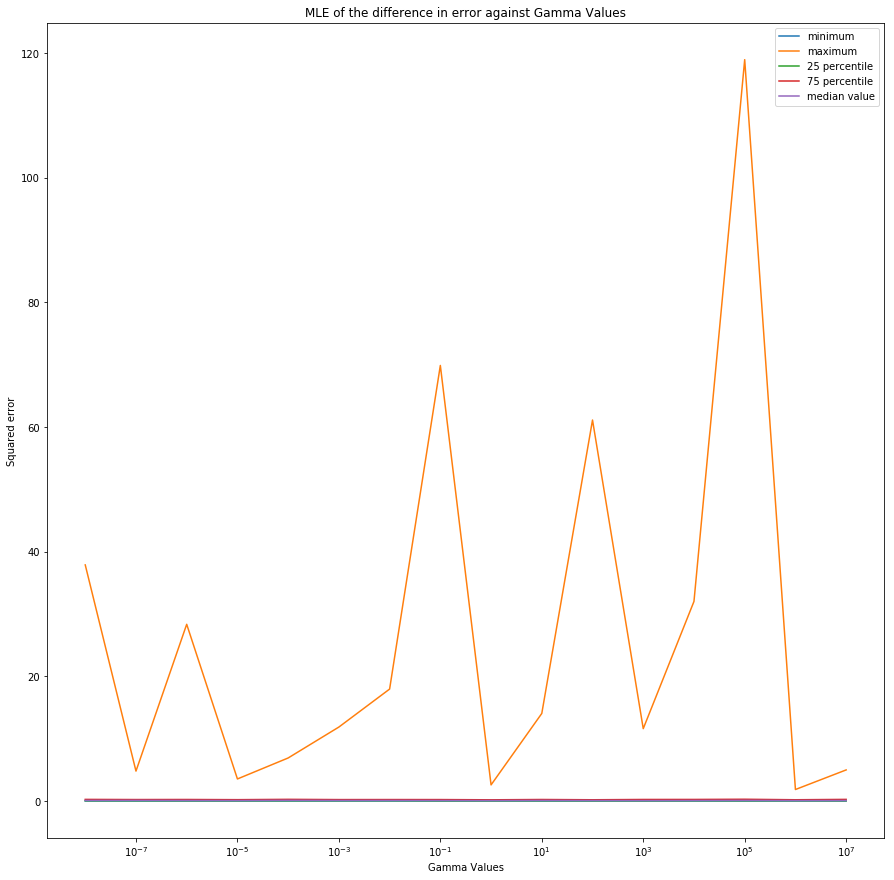

In [0]:
plt.figure(figsize=(15,15))
plt.plot(gamma2,q_min,label="minimum")
plt.plot(gamma2,q_max,label="maximum")
plt.plot(gamma2,q_25,label="25 percentile")
plt.plot(gamma2,q_75,label="75 percentile")
plt.plot(gamma2,q_med,label="median value")
plt.xscale('log')
plt.xlabel("Gamma Values")
plt.ylabel("Squared error")
plt.legend()
plt.title("MLE of the difference in error against Gamma Values")
# MLE

Text(0.5, 1.0, 'MAP estimate of the difference in error against Gamma Values')

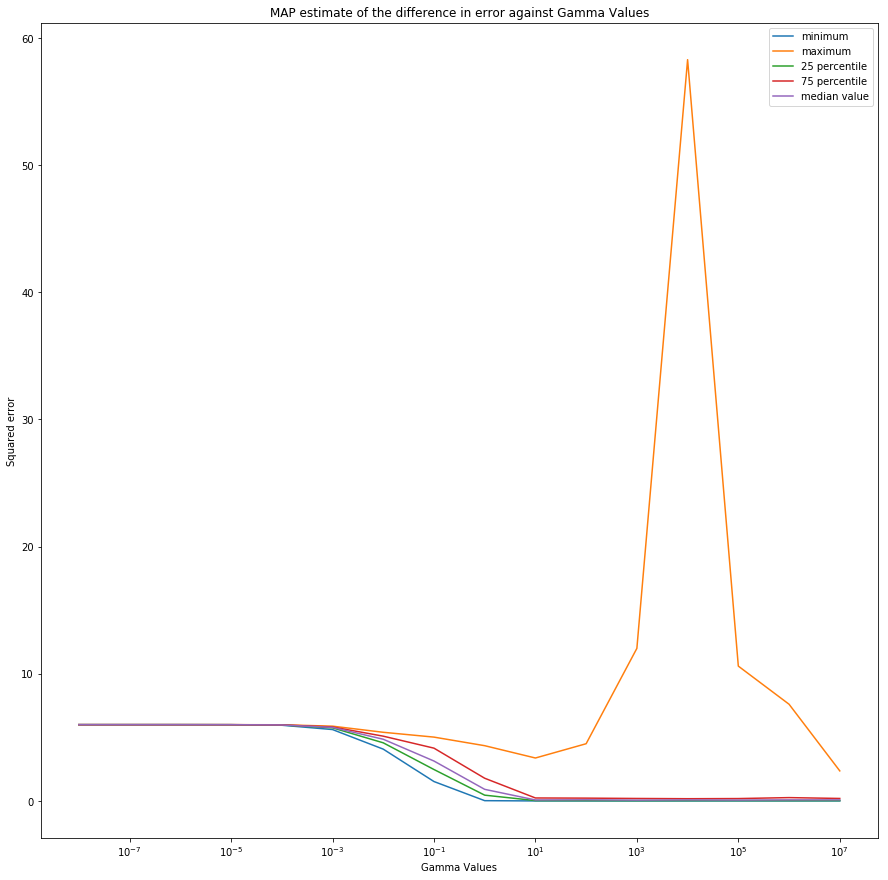

In [0]:
plt.figure(figsize=(15,15))
plt.plot(gamma2,q_min_M,label="minimum")
plt.plot(gamma2,q_max_M,label="maximum")
plt.plot(gamma2,q_25_M,label="25 percentile")
plt.plot(gamma2,q_75_M,label="75 percentile")
plt.plot(gamma2,q_med_M,label="median value")
plt.xscale('log')
plt.xlabel("Gamma Values")
plt.ylabel("Squared error")
plt.legend()
plt.title("MAP estimate of the difference in error against Gamma Values")
# MAP

Text(0.5, 1.0, 'Difference between MAP & MLE against Gamma Values')

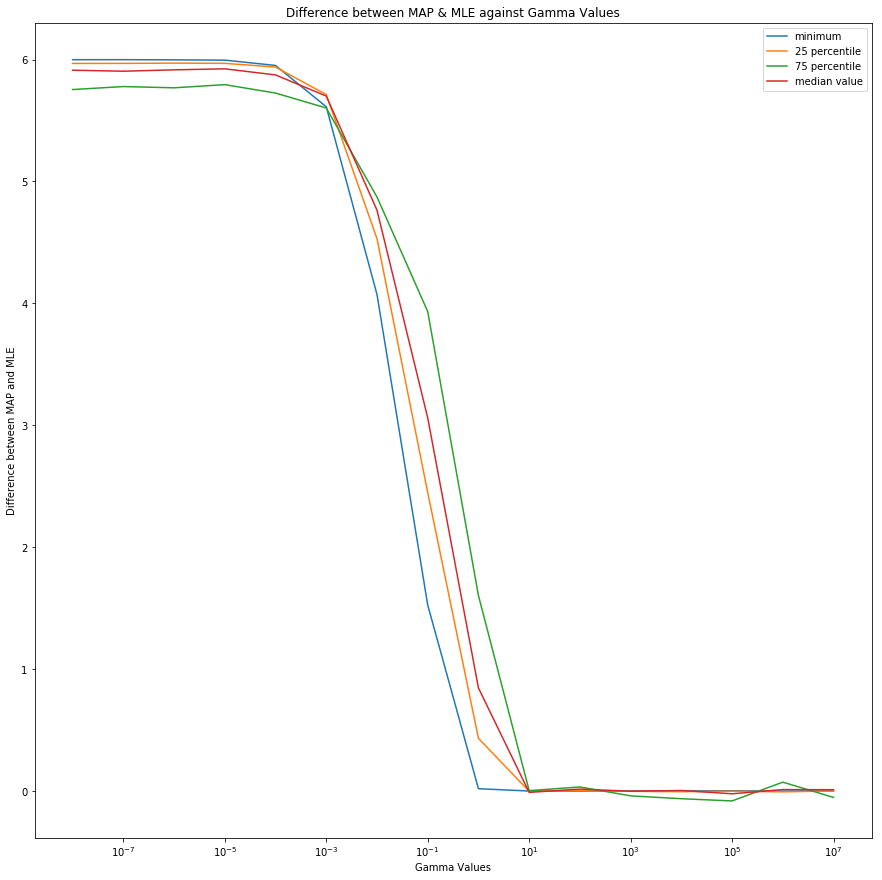

In [0]:
plt.figure(figsize=(15,15))
plt.plot(gamma2,diff_min,label="minimum")
#plt.plot(gamma2,diff_min,label="maximum")
plt.plot(gamma2,diff_25,label="25 percentile")
plt.plot(gamma2,diff_75,label="75 percentile")
plt.plot(gamma2,diff_med,label="median value")
plt.xscale('log')
plt.xlabel("Gamma Values")
plt.ylabel("Difference between MAP and MLE")
plt.legend()
plt.title("Difference between MAP & MLE against Gamma Values")
# MAP

# Question 2

In [0]:
xy_T=[-0.7,-0.4] # true location of points
sigma2=0.3**2 # value of sigma square
sigmaX_2=0.25**2 # value of sigma square x
sigmaY_2=0.25**2 # value of sigma square y
x0=xy_T[0] #True llocation values
y0=xy_T[1]
r=1

In [0]:
def MAP_CAL(k,xx1,yy1,r,l,sigma2,sigmaX_2,sigmaY_2,x0,y0):
  pk=[]
  for i in range(len(xx1)):
    prior=(((xx1[i]**2)/ sigmaX_2) + ((yy1[i]**2)/ sigmaY_2)) # not dividing prioir by 2
    #prior=(((x0**2)/ sigmaX_2) + ((y0**2)/ sigmaY_2)) # not dividing prioir by 2
    likelihood=0
    for j in range (k):
      likelihood+=((r[k-1][j] - np.sqrt( (xx1[i]-l[k-1][j][0])**2 + (yy1[i]-l[k-1][j][1])**2 ))**2 )
    pk.append(prior + (likelihood  / (sigma2) )) # didnt divide sigma by two for simplicity
    

  return(pk)

In [0]:
def localization_plot(k,xx,yy,pk4,x0,y0,x_min,y_min):
  plt.figure(figsize=(10,10))
  plt.contourf(xx, yy, pk4 , alpha=0.8,levels=25)#,levels=[100,500,1000,1500,3000,5000,8000,10000,12000,15000,20000,50000,100000,200000,500000])
  plt.plot(x0,y0,"r+",markersize=20,label="True Location")
  #plt.plot(x_min,y_min,'g+',markersize=20,label="Predicted Location")
  for i in range (k):
    plt.plot(l[k-1][i][0],l[k-1][i][1],"o",markersize=15,label="Landmark {}".format(i))
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title("Object Localization for {} points".format(k))
  plt.legend()


In [0]:
k=5 # Providing the value of K

In [0]:
l=[] # calculating landmark locations
for i in range(1,k+1):
  trial=[]
  for j in range(0,i):
    theta=(2*np.pi*(j+1)/i)
    xn=0 + np.round(r* np.cos(theta),2)
    yn=0 + np.round(r* np.sin(theta),2)
    trial.append([xn,yn])
  l.append(trial)
    
  

In [0]:
dd=[] # calculating the range measurements from the given landmark to the true points without noise
for i in l:
  check=[]
  for j in i:
    d=-1
    while(d<0):
      d=np.sum((np.array(j)-np.array(xy_T))**2)
      #print(j)
      #print(d)
    check.append(d)

  dd.append(check)  
  #print(check)
  #print('\n')
    
    

In [0]:
r=[] # calculating the range measurements from the given landmark to the true points with an additive noise.
for i in l:
  check=[]
  for j in i:
    d=-1
    while(d<0):
      n=np.random.normal(0,sigma2,1)
      #print("Noise={}".format(n))
      d=np.sum((np.array(j)-np.array(xy_T))**2) + n
      #print(j)
      #print(d)
    check.append(d)

  r.append(check)  
  #print(check)
  #print('\n')
    
    

In [0]:
l

[[[1.0, 0.0]],
 [[-1.0, 0.0], [1.0, 0.0]],
 [[-0.5, 0.87], [-0.5, -0.87], [1.0, 0.0]],
 [[0.0, 1.0], [-1.0, 0.0], [0.0, -1.0], [1.0, 0.0]],
 [[0.31, 0.95], [-0.81, 0.59], [-0.81, -0.59], [0.31, -0.95], [1.0, 0.0]]]

In [0]:
dd

[[3.05],
 [0.25000000000000006, 3.05],
 [1.6529, 0.26089999999999997, 3.05],
 [2.4499999999999997, 0.25000000000000006, 0.8499999999999999, 3.05],
 [2.8426, 0.9922, 0.0482, 1.3226, 3.05]]

In [0]:
r

[[array([2.99072179])],
 [array([0.20209334]), array([2.99570466])],
 [array([1.7955124]), array([0.19427312]), array([2.9542273])],
 [array([2.52576502]),
  array([0.40706788]),
  array([0.83140996]),
  array([2.90454193])],
 [array([2.95089678]),
  array([0.92011468]),
  array([0.06421599]),
  array([1.33962224]),
  array([3.0458264])]]

So far we have calculated the location of landmarks and the range measurements which include the noise.


In [0]:
def make_meshgrid():
    h=.01
    lp=200
    x_min, x_max = -2 - 0.1, 2 + 0.1
    y_min, y_max = -2 - 0.1, 2 + 0.1
    """xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))"""
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,lp),np.linspace(y_min,y_max,lp))
    return xx, yy

In [0]:
xx,yy=make_meshgrid()
xx1=xx.ravel()
yy1=yy.ravel()

In [0]:
def prior_CAL(k,xx1,yy1,r,l,sigma2,sigmaX_2,sigmaY_2):
  pk=[]
  for i in range(len(xx1)):
    prior=(((x0**2)/ sigmaX_2) + ((y0**2)/ (2*sigmaY_2))) # not dividing prioir by 2
    
    """likelihood=0
    for j in range (k):
      likelihood+=((r[k-1][j] - np.sqrt( (xx1[i]-l[k-1][j][0])**2 + (yy1[i]-l[k-1][j][1])**2 ))**2 )"""
    pk.append(prior)# + (likelihood  / (sigma2) )) # didnt divide sigma by two for simplicity
    

  return(pk)

In [0]:
def like_CAL(k,xx1,yy1,r,l,sigma2,sigmaX_2,sigmaY_2):
  pk=[]
  for i in range(len(xx1)):
    #prior=(((xx1[i]**2)/ sigmaX_2) + ((yy1[i]**2)/ (2*sigmaY_2))) # not dividing prioir by 2
    
    likelihood=0
    for j in range (k):
      likelihood+=((r[k-1][j] - np.sqrt( (xx1[i]-l[k-1][j][0])**2 + (yy1[i]-l[k-1][j][1])**2 ))**2 )
    pk.append(likelihood  / (2*sigma2) ) # didnt divide sigma by two for simplicity
    

  return(pk)

## For K=1 i.e. there is just one landmark

In [0]:
pk1=MAP_CAL(1,xx1,yy1,dd,l,sigma2,sigmaX_2,sigmaY_2,x0,y0)

In [0]:
x_min=xx1[np.argmin(pk1)]
y_min=yy1[np.argmin(pk1)]

In [0]:
np.min(pk1),np.max(pk1),np.mean(pk1),np.median(pk1)

(27.559481961668702, 146.47658692493505, 71.48095082227694, 69.4364557299999)

In [0]:
pk1=np.array(pk1).reshape(xx.shape)

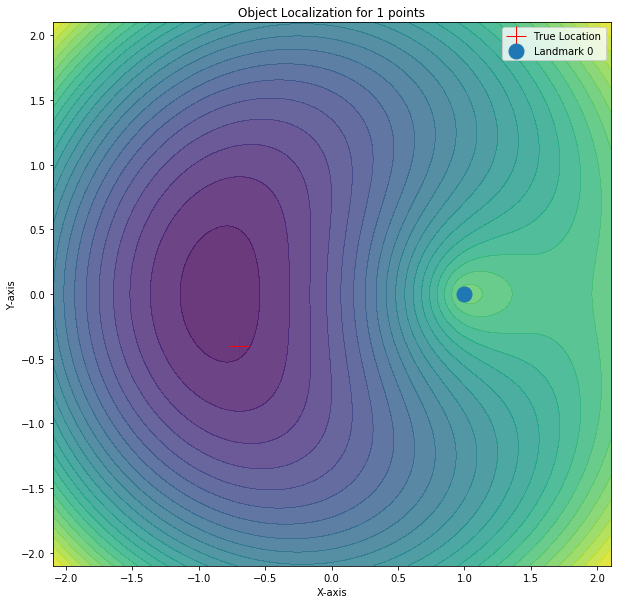

In [0]:

localization_plot(1,xx,yy,pk1,x0,y0,x_min,y_min)

 Finding for K=2

In [0]:
pk2=MAP_CAL(2,xx1,yy1,r,l,sigma2,sigmaX_2,sigmaY_2,x0,y0)

In [0]:
np.min(pk2),np.max(pk2),np.mean(pk2),np.median(pk2)

(26.121005332021095, 284.87691355833635, 106.40901198611078, 98.37336052661627)

In [0]:
pk2=np.array(pk2).reshape(xx.shape)

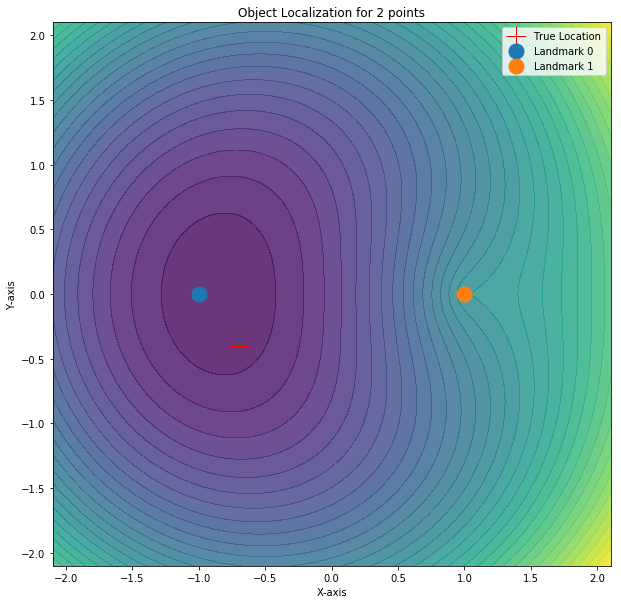

In [0]:
localization_plot(2,xx,yy,pk2,x0,y0,x_min,y_min)

For K=3

In [0]:
pk3=MAP_CAL(3,xx1,yy1,dd,l,sigma2,sigmaX_2,sigmaY_2,x0,y0)

In [0]:
x_min=xx1[np.argmin(pk1)]
y_min=yy1[np.argmin(pk1)]

In [0]:
np.min(pk3),np.max(pk3),np.mean(pk3),np.median(pk3)

(30.938170761419663, 313.8690985652725, 113.45348391011191, 106.74905015996177)

In [0]:

pk3=np.array(pk3).reshape(xx.shape)

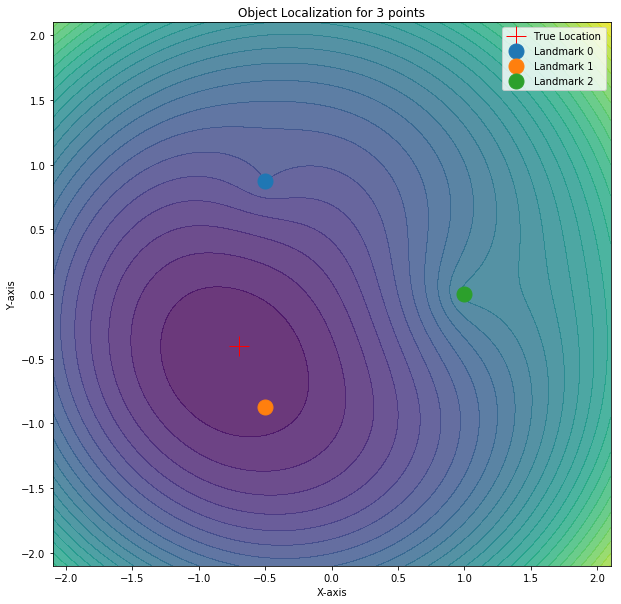

In [0]:
localization_plot(3,xx,yy,pk3,x0,y0,x_min,y_min)

for k=4

In [0]:

pk4=MAP_CAL(4,xx1,yy1,r,l,sigma2,sigmaX_2,sigmaY_2,x0,y0)

In [0]:
x_min=xx1[np.argmin(pk1)]
y_min=yy1[np.argmin(pk1)]

In [0]:
np.min(pk4),np.max(pk4),np.mean(pk4),np.median(pk4)


(33.81293484848712, 362.58117245247894, 128.0503674687582, 122.83483722143863)

In [0]:
pk4=np.array(pk4).reshape(xx.shape)

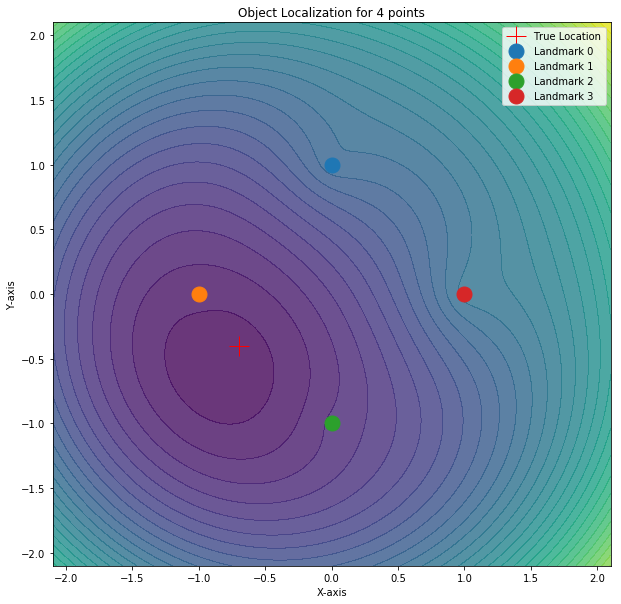

In [0]:
localization_plot(4,xx,yy,pk4,x0,y0,x_min,y_min)